# Fiducials and test stars selection for B90

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


%matplotlib widget

In [2]:
input_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/Catalogs/catalog.xym'
data = pd.read_csv(input_file, sep='\t')

mag_limit = -5. 
data_spatial = data[(data['F814W'] < mag_limit) & (data['F555W'] < mag_limit)]

In [3]:
# Plot the spatial distribution and the selected old cluster (B 90) and young one (NGC 346)

# center and approximative radius of the old cluster
center_B90 = np.array([5000, 7000])
radius_B90 = 1000

# center and approximative radius of the reference field
center_reference = np.array([3000, 3000])
radius_reference = 1000

# compute the distance and select the stars in the two clusters
data['distance_B90'] = np.sqrt((data['x'] - center_B90[0]) ** 2 + (data['y'] - center_B90[1]) ** 2)
data['distance_reference'] = np.sqrt((data['x'] - center_reference[0]) ** 2 + (data['y'] - center_reference[1]) ** 2)

data_B90_cluster = data[data['distance_B90'] < radius_B90]
data_reference_field = data[data['distance_reference'] < radius_reference]

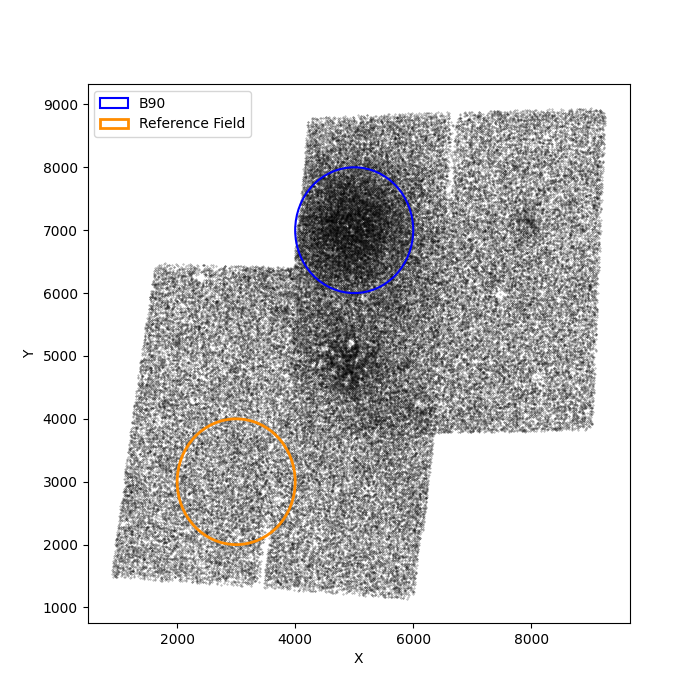

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(data_spatial['x'], data_spatial['y'], s=0.1, alpha=0.5, c='black') #c=data_spatial['F814W'], cmap = 'magma_r')
circle_B90 = plt.Circle(center_B90, radius_B90, color='blue', fill=False, linestyle='-', linewidth=1.5, label=r'B90')
ax.add_patch(circle_B90)
circle_reference = plt.Circle(center_reference, radius_reference, color='darkorange', fill=False, linestyle='-', linewidth=2, label=r'Reference Field')
ax.add_patch(circle_reference)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Optical CMD

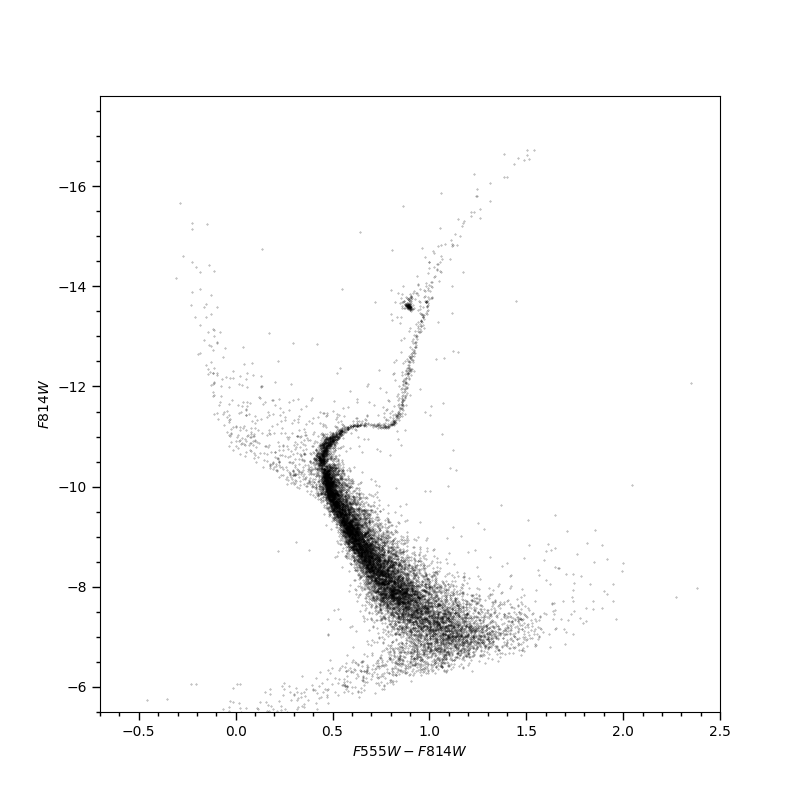

In [5]:
# Optical CMD
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(data_B90_cluster['F555W']-data_B90_cluster['F814W'], data_B90_cluster['F814W'], s=0.1, alpha=0.5, c='black')

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlim(-0.7,2.5)
plt.ylim(-5.5, -17.8)
plt.xlabel(r'$F555W-F814W$')
plt.ylabel(r'$F814W$')
plt.show()

## UV CMD

/var/folders/nx/ljvhqy816sn3y2d3hzwxcqhc0000gn/T/ipykernel_8377/2555625969.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6, 6))


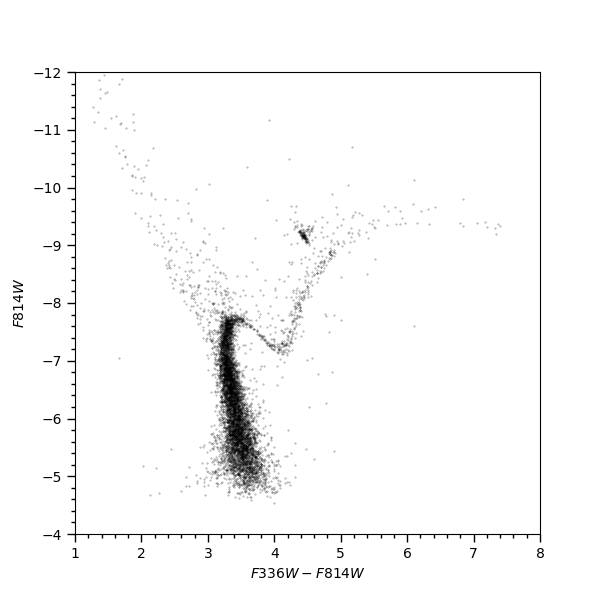

In [31]:
# Optical CMD
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(data_B90_cluster['F336W']-data_B90_cluster['F814W'], data_B90_cluster['F336W'], s=0.1, alpha=0.5, c='black')

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlim(1,8)
plt.ylim(-4,-12)
plt.xlabel(r'$F336W-F814W$')
plt.ylabel(r'$F814W$')
plt.show()

## Select fiducial for the optical CMD

First build all the fiducials you need to create a complete set for the filter you have. 

In [7]:
import sys
import os

# set the path to the tools folder
module_path = '/Users/giadaaggio/Desktop/Thesis/TOTORO/CODES/tools'
sys.path.append(module_path)

from CMDAnalyzer import CMDFiducialSelector

In [39]:
select = False

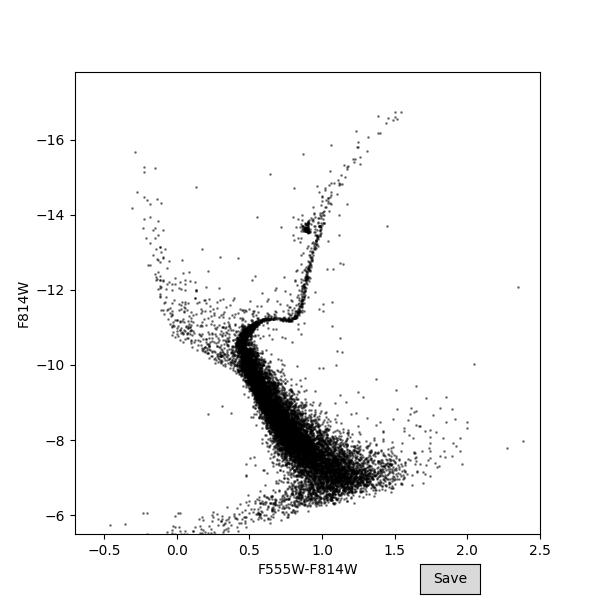

In [40]:
if select == True:
    fiducial_555_814 = CMDFiducialSelector(
        data=data_B90_cluster, 
        color=data_B90_cluster['F555W']-data_B90_cluster['F814W'], 
        magnitude=data_B90_cluster['F814W'],
        x_label="F555W-F814W",  # Example color index
        y_label="F814W",  # Example magnitude
        output_file="/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/fid_B90_555_814.csv",
        xlim=(-0.7,2.5),
        ylim=(-5.5, -17.8),
        invert_yaxis=False,
    )

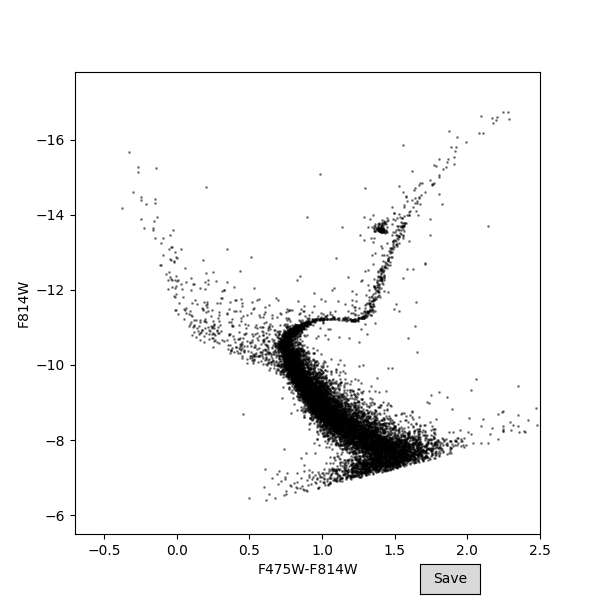

In [43]:
if select == True:
    fiducial_475_814 = CMDFiducialSelector(
        data=data_B90_cluster, 
        color=data_B90_cluster['F475W']-data_B90_cluster['F814W'], 
        magnitude=data_B90_cluster['F814W'],
        x_label="F475W-F814W",  # Example color index
        y_label="F814W",  # Example magnitude
        output_file="/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/HB_B90_475_814.csv",
        xlim=(-0.7,2.5),
        ylim=(-5.5, -17.8),
        invert_yaxis=False,
    )

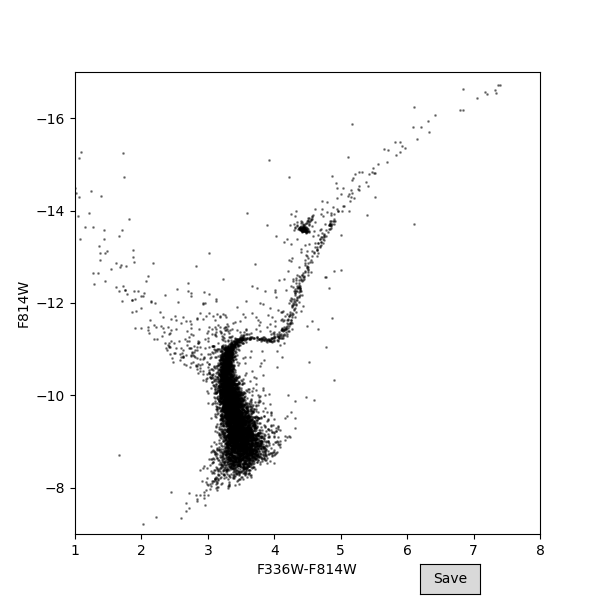

Selected point: (3.800, -14.814)
Selected point: (4.334, -13.653)
Selected point: (4.432, -13.595)
Selected point: (4.521, -13.550)
Fiducial line saved to /Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/HB_B90_336_814.csv


In [51]:
if select == True:
    fiducial_336_814 = CMDFiducialSelector(
        data=data_B90_cluster, 
        color=data_B90_cluster['F336W']-data_B90_cluster['F814W'], 
        magnitude=data_B90_cluster['F814W'],
        x_label="F336W-F814W",  # Example color index
        y_label="F814W",  # Example magnitude
        output_file="/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/HB_B90_336_814.csv",
        xlim=(1,8),
        ylim=(-7,-17),
        invert_yaxis=False,
    )

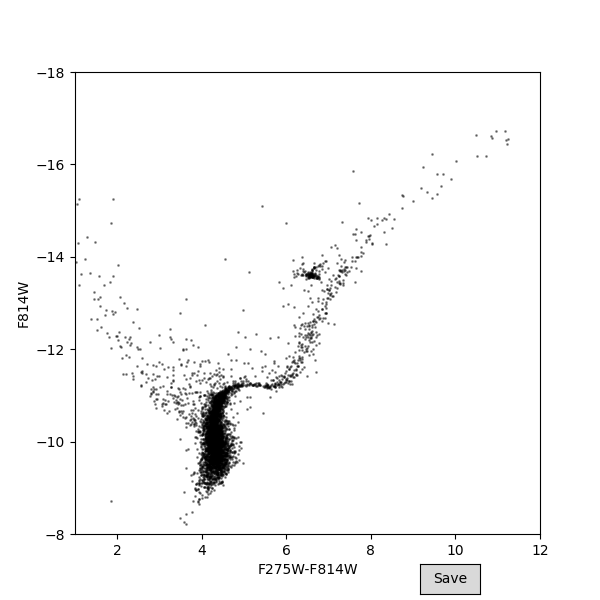

In [60]:
if select == True:
    fiducial_275_814 = CMDFiducialSelector(
        data=data_B90_cluster, 
        color=data_B90_cluster['F275W']-data_B90_cluster['F814W'], 
        magnitude=data_B90_cluster['F814W'],
        x_label="F275W-F814W",  # Example color index
        y_label="F814W",  # Example magnitude
        output_file="/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/HB_B90_275_814.csv",
        xlim=(1,12),
        ylim=(-8,-18),
        invert_yaxis=False,
    )

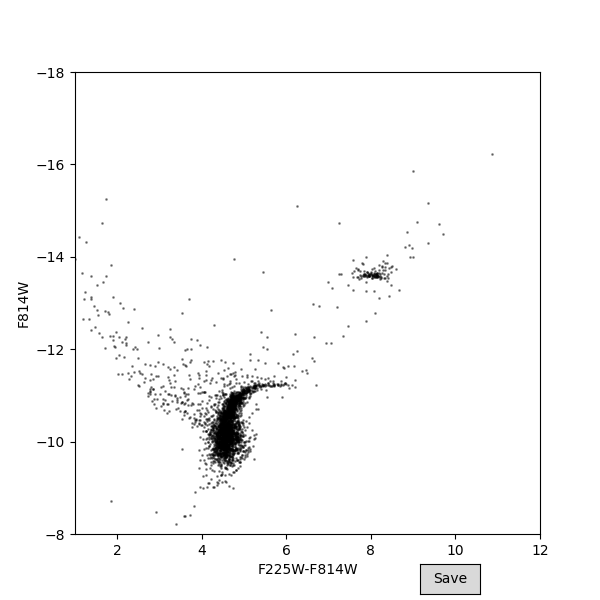

In [63]:
if select == True:
    fiducial_225_814 = CMDFiducialSelector(
        data=data_B90_cluster, 
        color=data_B90_cluster['F225W']-data_B90_cluster['F814W'], 
        magnitude=data_B90_cluster['F814W'],
        x_label="F225W-F814W",  # Example color index
        y_label="F814W",  # Example magnitude
        output_file="/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/fid_B90_225_814.csv",
        xlim=(1,12),
        ylim=(-8,-18),
        invert_yaxis=False,
    )

----

In [66]:
# main sequence fiducials
fiducial_555_814 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/fid_B90_555_814.csv')
fiducial_475_814 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/fid_B90_475_814.csv')
fiducial_336_814 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/fid_B90_336_814.csv')
fiducial_275_814 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/fid_B90_275_814.csv')

# HB fiducials
HB_fiducial_555_814 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/HB_B90_555_814.csv')
HB_fiducial_475_814 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/HB_B90_475_814.csv')
HB_fiducial_336_814 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/HB_B90_336_814.csv')
HB_fiducial_275_814 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/HB_B90_275_814.csv')


In [69]:
mags = [-16.5, -16, -15.5, -15, -14.5, -14, -13.5, -13, -12.5, -12, -11.5, -11.2, -11, -10.5, -10, -9.5, -9, -8.5, -8, -7.5, -7]
mags_HB = [-13.65, -13.60, -13.55]

test_stars = pd.DataFrame()
test_stars['F814W'] = mags

hb_stars = pd.DataFrame()
hb_stars['F814W'] = mags_HB

def build_test_star(test_stars, hb_stars, mags, fiducial, fiducial_HB, filter_B):
    x_val = fiducial['X']
    y_val = fiducial['Y']

    # interpolate for the main sequence
    interp_func = interp1d(y_val, x_val, kind='linear', fill_value='extrapolate')
    colors = interp_func(mags)
    mags_2 = colors + mags

    test_stars[filter_B] = mags_2

    # interpolate for the HB

    x_val_HB = fiducial_HB['X']
    y_val_HB = fiducial_HB['Y']

    interp_func_HB = interp1d(y_val_HB, x_val_HB, kind='linear', fill_value='extrapolate')
    colors_HB = interp_func_HB(mags_HB)

    hb_stars[filter_B] = colors_HB + hb_stars['F814W']

    return test_stars, hb_stars

In [76]:
test_stars_1, hb_stars_1 = build_test_star(test_stars, hb_stars, mags, fiducial_555_814, HB_fiducial_555_814, 'F555W')
test_stars_2, hb_stars_2 = build_test_star(test_stars_1, hb_stars_1, mags, fiducial_475_814, HB_fiducial_475_814, 'F475W')
test_stars_3, hb_stars_3 = build_test_star(test_stars_2, hb_stars_2, mags, fiducial_336_814, HB_fiducial_336_814, 'F336W')
test_stars_4, hb_stars_4 = build_test_star(test_stars_3, hb_stars_3, mags, fiducial_275_814, HB_fiducial_275_814, 'F275W')

test_stars_4['source'] = 'test_stars'
hb_stars_4['source'] = 'HB_test_stars'

In [86]:
test_set_final = pd.concat([test_stars_4, hb_stars_4], ignore_index=True)

# Save the test set
#test_set_final.to_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/test_stars_B90.csv', index=False, sep=' ', float_format='%.4f')

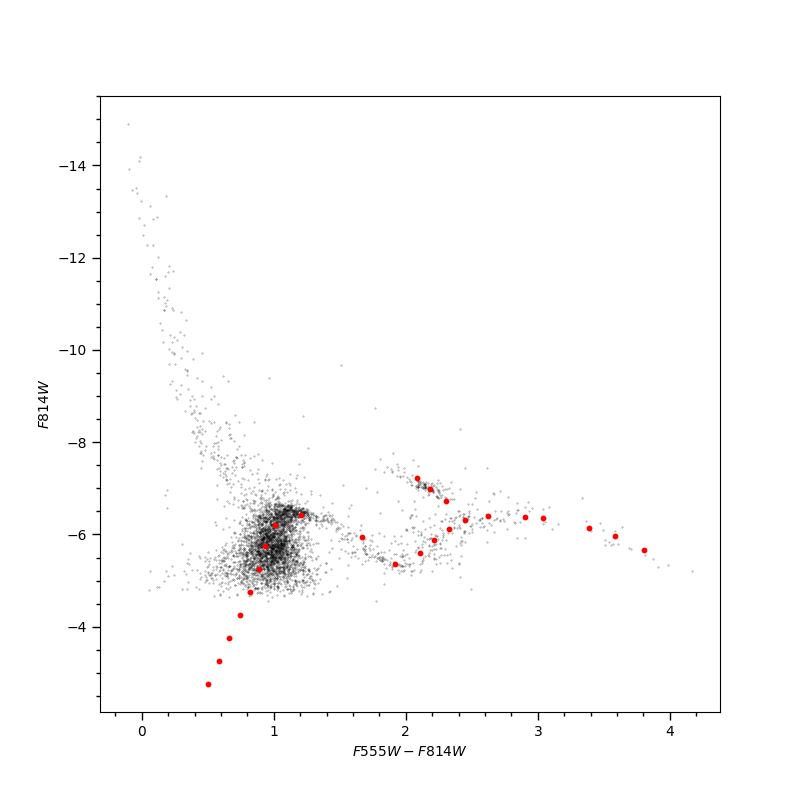

In [89]:
# Optical CMD
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(data_B90_cluster['F275W']-data_B90_cluster['F336W'], data_B90_cluster['F275W'], s=0.1, alpha=0.5, c='black')
plt.scatter(test_set_final['F275W']-test_set_final['F336W'], test_set_final['F275W'], s=10, alpha=1, c='red')

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlabel(r'$F555W-F814W$')
plt.ylabel(r'$F814W$')
plt.show()